In [46]:
import numpy as np
import pandas as pd
import json
from datetime import datetime, timedelta

In [44]:
for client_id in range(20):

    data = open(f"../projects/32_pure_test_NIID_a01_20c_alexnet_2/client_{client_id}/logs_debug.txt", "r").read()

    data_str = [line for line in data.split("\n") if ("Fine" in line) and ("Epoch" not in line)]

    dts = []
    DT_FORMAT = "%Y-%m-%d %H:%M:%S"
    for idx in range(len(data_str)):
        line = data_str[idx]
        if "started." in line:
            try:
                ended = data_str[idx + 1]
                s_date = datetime.strptime(line.split(" INFO")[0], DT_FORMAT)
                e_date = datetime.strptime(ended.split(" INFO")[0], DT_FORMAT)
                # print((e_date - s_date).seconds)
                # print(e_date - s_date)
                dts.append(e_date - s_date)
            except:
                pass
        
    td = sum(dts, timedelta()) / len(dts)
    print(f"Client {client_id} : {str(td)}")

Client 0 : 1:01:54.833333
Client 1 : 0:23:59.416667
Client 2 : 0:48:27.416667
Client 3 : 1:14:01.727273
Client 4 : 1:00:15.833333
Client 5 : 1:06:13.916667
Client 6 : 0:38:14.166667
Client 7 : 0:49:43.833333
Client 8 : 0:16:53.750000
Client 9 : 2:37:32.818182
Client 10 : 0:55:27.083333
Client 11 : 0:35:54.083333
Client 12 : 0:26:15.666667
Client 13 : 0:41:45.666667
Client 14 : 0:36:04.666667
Client 15 : 0:25:34.166667
Client 16 : 1:03:37.916667
Client 17 : 0:53:06.333333
Client 18 : 0:50:01.750000
Client 19 : 0:17:40.583333


In [70]:
conf = json.load(open("../data/32_Cifar10_NIID_20c_a01/config.json", "r"))
conf = json.load(open("../projects/single_client_9_fed_sim_NIID_alpha01/data/config.json", "r"))

idx = 0
for client in conf['Size of samples for labels in clients']:
    counts = np.sum(np.asarray(client), axis=0)[1]
    print(f"Client {idx} : {counts}")
    print(client)
    idx +=1

Client 0 : 4208
[[0, 774], [2, 1], [6, 75], [7, 3358]]
Client 1 : 813
[[2, 59], [7, 4], [8, 750]]
Client 2 : 3468
[[0, 784], [3, 607], [4, 905], [5, 1172]]
Client 3 : 4668
[[2, 1355], [4, 70], [5, 1400], [6, 6], [9, 1837]]
Client 4 : 3541
[[0, 3], [1, 1553], [3, 135], [4, 7], [6, 49], [8, 1794]]
Client 5 : 4370
[[0, 31], [1, 1], [2, 182], [4, 566], [5, 82], [8, 1], [9, 3507]]
Client 6 : 1992
[[1, 1], [7, 1972], [8, 19]]
Client 7 : 3254
[[1, 31], [2, 10], [4, 659], [8, 2015], [9, 539]]
Client 8 : 710
[[0, 149], [1, 15], [2, 37], [3, 356], [5, 66], [7, 87]]
Client 9 : 8577
[[1, 2785], [2, 1], [3, 7], [6, 5784]]
Client 10 : 3205
[[0, 5], [1, 541], [2, 167], [4, 2492]]
Client 11 : 1822
[[2, 1719], [5, 2], [7, 1], [9, 100]]
Client 12 : 1378
[[0, 1], [1, 209], [2, 3], [4, 45], [5, 31], [7, 536], [8, 553]]
Client 13 : 2548
[[1, 2], [2, 2283], [3, 7], [5, 227], [6, 20], [9, 9]]
Client 14 : 2326
[[0, 438], [1, 659], [2, 1], [4, 1135], [5, 44], [6, 1], [7, 41], [9, 7]]
Client 15 : 1740
[[0, 602]

Client 0 : 4208
[[0, 774], [2, 1], [6, 75], [7, 3358]]
Client 2 : 3468
[[0, 784], [3, 607], [4, 905], [5, 1172]]
Client 3 : 4668
[[2, 1355], [4, 70], [5, 1400], [6, 6], [9, 1837]]
Client 4 : 3541
[[0, 3], [1, 1553], [3, 135], [4, 7], [6, 49], [8, 1794]]
Client 5 : 4370
[[0, 31], [1, 1], [2, 182], [4, 566], [5, 82], [8, 1], [9, 3507]]
Client 7 : 3254
[[1, 31], [2, 10], [4, 659], [8, 2015], [9, 539]]
Client 9 : 8577
[[1, 2785], [2, 1], [3, 7], [6, 5784]]
Client 10 : 3205
[[0, 5], [1, 541], [2, 167], [4, 2492]]
Client 13 : 2548
[[1, 2], [2, 2283], [3, 7], [5, 227], [6, 20], [9, 9]]
Client 14 : 2326
[[0, 438], [1, 659], [2, 1], [4, 1135], [5, 44], [6, 1], [7, 41], [9, 7]]
Client 16 : 4495
[[1, 127], [2, 84], [3, 4284]]
Client 17 : 3041
[[1, 2], [3, 1], [5, 2974], [6, 64]]
Client 18 : 3122
[[0, 2948], [3, 174]]


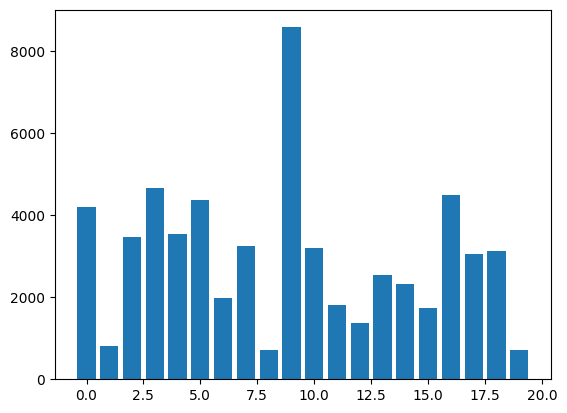

In [71]:
# conf = json.load(open("../data/Cifar10_NIID_a01_140c/config.json", "r"))

idx = 0
counts = []
for client in conf['Size of samples for labels in clients']:
    count = np.sum(np.asarray(client), axis=0)[1]
    counts.append(count)
    if count > 2000:
        print(f"Client {idx} : {count}")
        print(client)
    idx +=1

import matplotlib.pyplot as plt

h = counts
plt.bar(np.arange(len(h)),h)
plt.show()

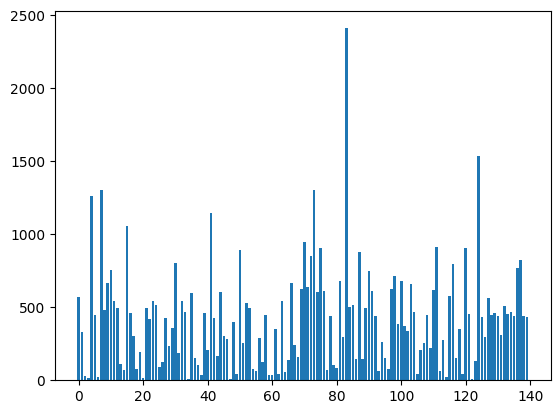